In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import squarify


import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from __future__ import division
import plotly.offline as offline
offline.init_notebook_mode()
from plotly import tools
import missingno as msno
from mpl_toolkits.basemap import Basemap
from numpy import array
from matplotlib import cm
import cufflinks as cf
cf.go_offline()


In [2]:
schema = pd.read_csv("survey_results_schema.csv")
public = pd.read_csv("survey_results_public.csv")

C:\Users\Shemonti\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning:

Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types.Specify dtype option on import or set low_memory=False.



In [3]:
schema.head(5)

Column                                       QuestionText
0  Respondent  Randomized respondent ID number (not in order ...
1       Hobby                            Do you code as a hobby?
2  OpenSource         Do you contribute to open source projects?
3     Country          In which country do you currently reside?
4     Student  Are you currently enrolled in a formal, degree...

In [4]:
pd.options.display.max_colwidth = 500
schema[:10]

Column  \
0       Respondent   
1            Hobby   
2       OpenSource   
3          Country   
4          Student   
5       Employment   
6  FormalEducation   
7   UndergradMajor   
8      CompanySize   
9          DevType   

                                                                                                                                      QuestionText  
0                                                                           Randomized respondent ID number (not in order of survey response time)  
1                                                                                                                          Do you code as a hobby?  
2                                                                                                       Do you contribute to open source projects?  
3                                                                                                        In which country do you currently reside?  
4                                                           Are you currently enrolled in a formal, degree-granting college or university program?  
5                                                                            Which of the following best describes your current employment status?  
6                                               Which of the following best describes the highest level of formal education that you’ve completed?  
7  You previously indicated that you went to a college or university. Which of the following best describes your main field of study (aka 'major')  
8                                                          Approximately how many people are employed by the company or organization you work for?  
9                                                                               Which of the following describe you? Please select all that apply.

In [5]:
public.head()

Respondent Hobby OpenSource         Country         Student  \
0           1   Yes         No           Kenya              No   
1           3   Yes        Yes  United Kingdom              No   
2           4   Yes        Yes   United States              No   
3           5    No         No   United States              No   
4           7   Yes         No    South Africa  Yes, part-time   

           Employment                                         FormalEducation  \
0  Employed part-time                Bachelor’s degree (BA, BS, B.Eng., etc.)   
1  Employed full-time                Bachelor’s degree (BA, BS, B.Eng., etc.)   
2  Employed full-time                                        Associate degree   
3  Employed full-time                Bachelor’s degree (BA, BS, B.Eng., etc.)   
4  Employed full-time  Some college/university study without earning a degree   

                                                    UndergradMajor  \
0                                        Mathematics or statistics   
1              A natural science (ex. biology, chemistry, physics)   
2  Computer science, computer engineering, or software engineering   
3  Computer science, computer engineering, or software engineering   
4  Computer science, computer engineering, or software engineering   

                CompanySize  \
0        20 to 99 employees   
1  10,000 or more employees   
2        20 to 99 employees   
3      100 to 499 employees   
4  10,000 or more employees   

                                                                                                                         DevType  \
0                                                                                                           Full-stack developer   
1                                             Database administrator;DevOps specialist;Full-stack developer;System administrator   
2                                                                                       Engineering manager;Full-stack developer   
3                                                                                                           Full-stack developer   
4  Data or business analyst;Desktop or enterprise applications developer;Game or graphics developer;QA or test developer;Student   

   ...                    Exercise Gender         SexualOrientation  \
0  ...        3 - 4 times per week   Male  Straight or heterosexual   
1  ...   Daily or almost every day   Male  Straight or heterosexual   
2  ...                         NaN    NaN                       NaN   
3  ...  I don't typically exercise   Male  Straight or heterosexual   
4  ...        3 - 4 times per week   Male  Straight or heterosexual   

                                         EducationParents  \
0                Bachelor’s degree (BA, BS, B.Eng., etc.)   
1                Bachelor’s degree (BA, BS, B.Eng., etc.)   
2                                                     NaN   
3  Some college/university study without earning a degree   
4  Some college/university study without earning a degree   

                  RaceEthnicity                Age Dependents  MilitaryUS  \
0   Black or of African descent  25 - 34 years old        Yes         NaN   
1  White or of European descent  35 - 44 years old        Yes         NaN   
2                           NaN                NaN        NaN         NaN   
3  White or of European descent  35 - 44 years old         No          No   
4  White or of European descent  18 - 24 years old        Yes         NaN   

                          SurveyTooLong     SurveyEasy  
0  The survey was an appropriate length      Very easy  
1  The survey was an appropriate length  Somewhat easy  
2                                   NaN            NaN  
3  The survey was an appropriate length  Somewhat easy  
4  The survey was an appropriate length  Somewhat easy  

[5 rows x 129 columns]

In [6]:
public.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98855 entries, 0 to 98854
Columns: 129 entries, Respondent to SurveyEasy
dtypes: float64(41), int64(1), object(87)
memory usage: 97.3+ MB


### Checking null values

In [7]:
public.isnull().sum()

Respondent           0
Hobby                0
OpenSource           0
Country            412
Student           3954
                 ...  
Age              34281
Dependents       36259
MilitaryUS       83074
SurveyTooLong    32914
SurveyEasy       32976
Length: 129, dtype: int64

In [8]:
null_values=public.isnull().sum().sort_values(ascending=False)
percentages=(public.isnull().sum().sort_values(ascending=False)/public.shape[0])*100
missing_data=pd.concat([null_values,percentages],axis=1,keys=['null_value','percentage'])
missing_data.head()

null_value  percentage
TimeAfterBootcamp       92203   93.270952
MilitaryUS              83074   84.036215
HackathonReasons        73164   74.011431
ErgonomicDevices        64797   65.547519
AdBlockerReasons        61110   61.817814

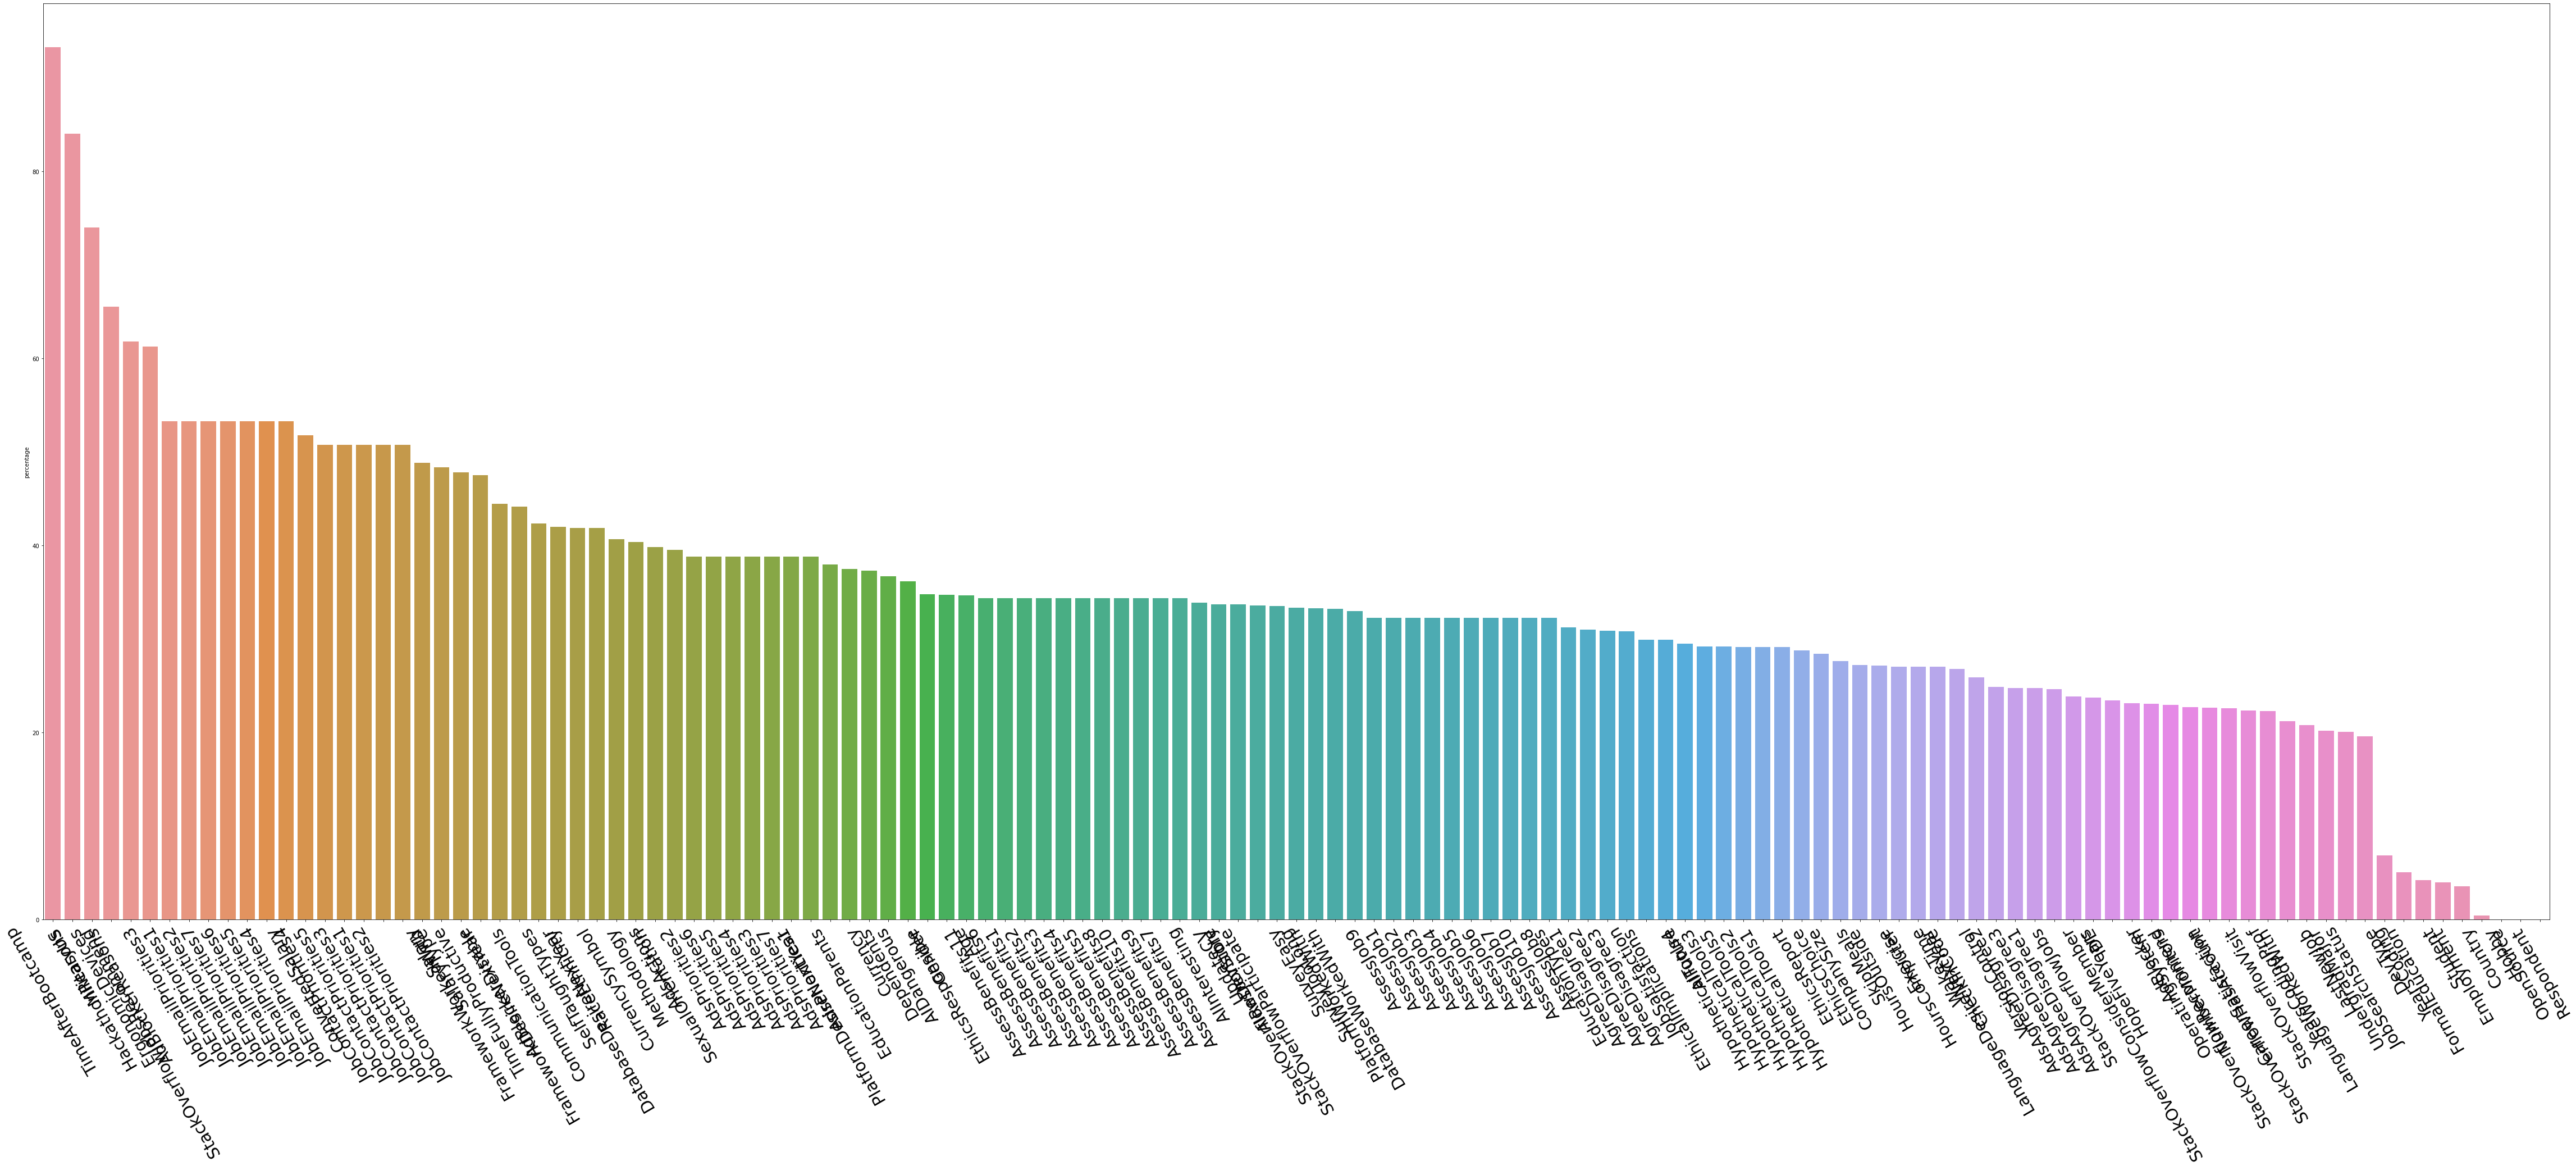

In [9]:
plt.figure(figsize = (80, 30))
ax =sns.barplot(missing_data.index, missing_data ['percentage'])
plt.xticks(rotation = 120, fontsize = 30)
plt.show()

### analysing countries

In [10]:
country_name=public['Country'].value_counts().to_frame()
country_name.head()

Country
United States     20309
India             13721
Germany            6459
United Kingdom     6221
Canada             3393

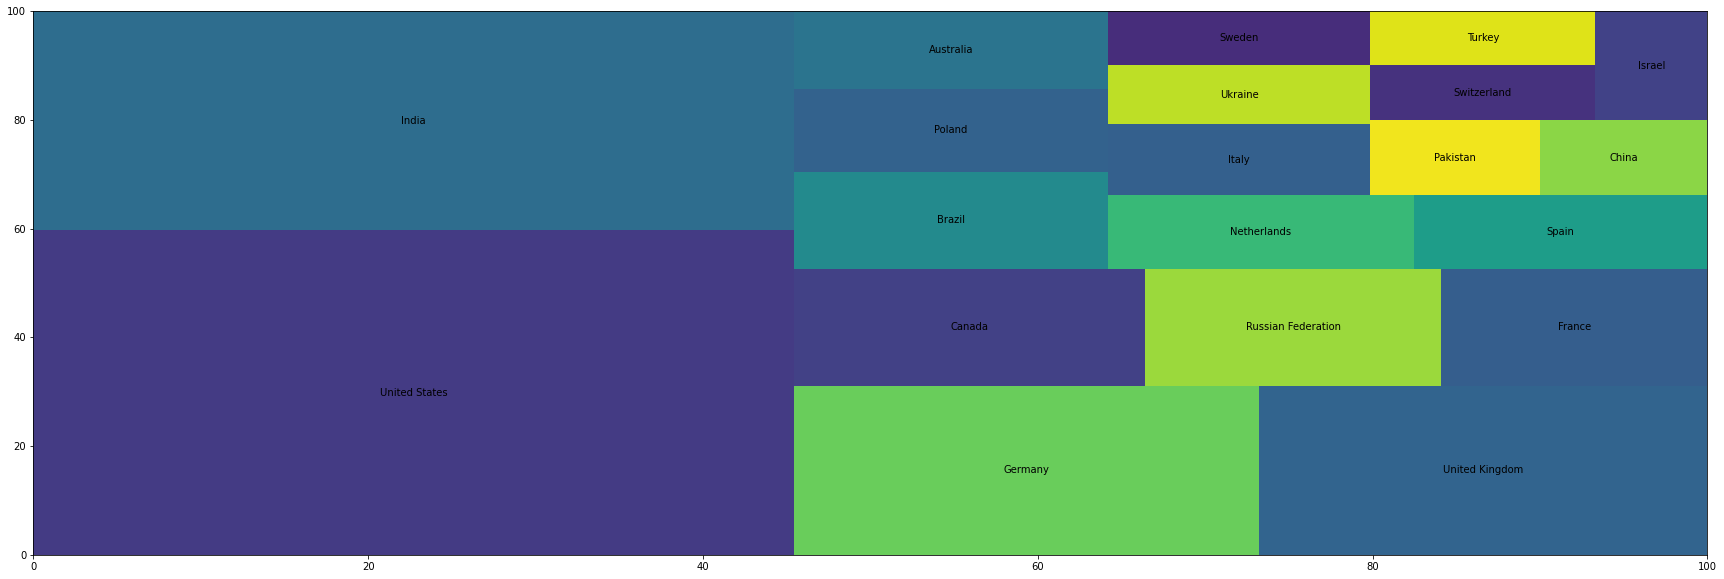

In [11]:
squarify.plot(sizes=country_name['Country'].values[:20],label = country_name.index[:20])
plt.rcParams.update({'font.size':20})
fig = plt.gcf().set_size_inches(30,10)
plt.show()


In [12]:
from wordcloud import WordCloud

In [13]:
country=public['Country'].value_counts().reset_index()
country.head()

index  Country
0   United States    20309
1           India    13721
2         Germany     6459
3  United Kingdom     6221
4          Canada     3393

In [14]:
country=country['index'].str.replace(" ","_")
country.head()

0     United_States
1             India
2           Germany
3    United_Kingdom
4            Canada
Name: index, dtype: object

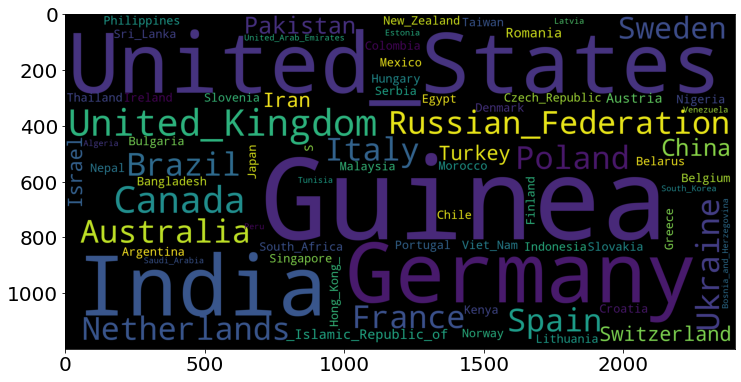

In [15]:
country_cloud=WordCloud(scale=6).generate(" ".join(country))
plt.figure(figsize=(12,8))
plt.imshow(country_cloud)
plt.show()

### gender

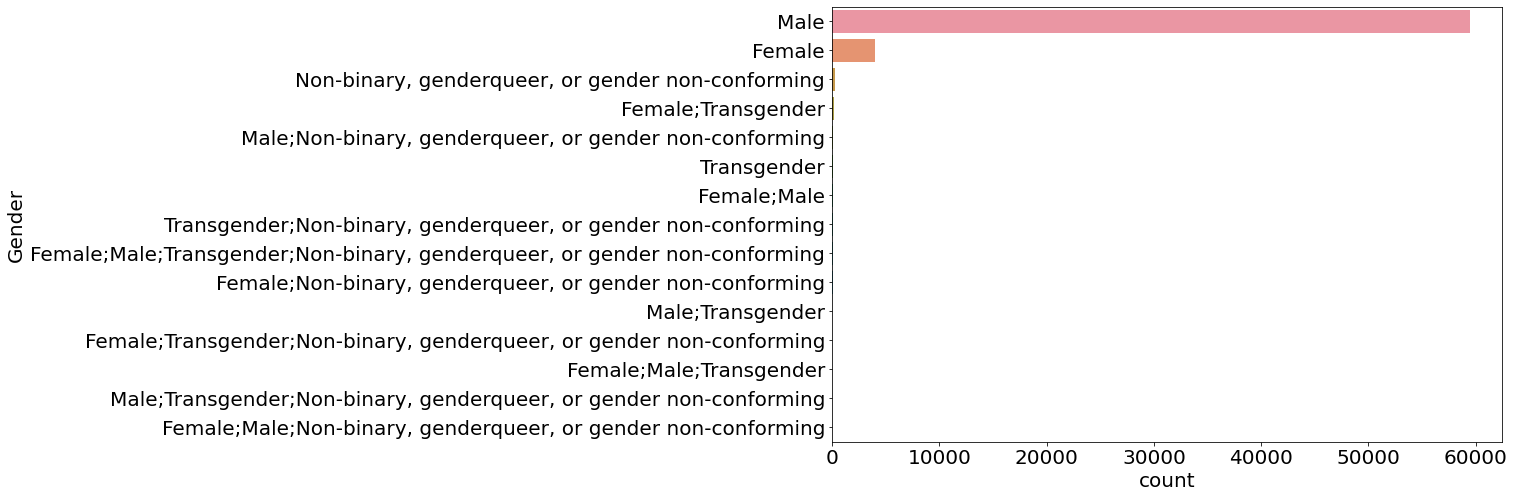

In [16]:
fig=plt.figure(figsize=(12,8))
sns.countplot(y=public['Gender'],order=public['Gender'].value_counts().index)
plt.show()

### job


In [17]:
job=[]
dev_job=public['DevType'].dropna()
for i in dev_job.index:
    job.extend([x for x in dev_job[i].split(';')])

In [18]:
job

['Full-stack developer',
 'Database administrator',
 'DevOps specialist',
 'Full-stack developer',
 'System administrator',
 'Engineering manager',
 'Full-stack developer',
 'Full-stack developer',
 'Data or business analyst',
 'Desktop or enterprise applications developer',
 'Game or graphics developer',
 'QA or test developer',
 'Student',
 'Back-end developer',
 'Database administrator',
 'Front-end developer',
 'Full-stack developer',
 'Back-end developer',
 'Front-end developer',
 'Full-stack developer',
 'Designer',
 'Front-end developer',
 'QA or test developer',
 'Back-end developer',
 'C-suite executive (CEO, CTO, etc.)',
 'Data or business analyst',
 'Database administrator',
 'DevOps specialist',
 'Engineering manager',
 'Full-stack developer',
 'System administrator',
 'Designer',
 'Back-end developer',
 'Database administrator',
 'Mobile developer',
 'System administrator',
 'Back-end developer',
 'Front-end developer',
 'Full-stack developer',
 'Back-end developer',
 'Fro

In [19]:
type(job)

list

In [20]:
from collections import Counter

In [21]:
unique_job=dict(Counter(job))

In [22]:
unique_job

{'Full-stack developer': 44353,
 'Database administrator': 13216,
 'DevOps specialist': 9549,
 'System administrator': 10375,
 'Engineering manager': 5256,
 'Data or business analyst': 7559,
 'Desktop or enterprise applications developer': 15807,
 'Game or graphics developer': 4642,
 'QA or test developer': 6194,
 'Student': 15732,
 'Back-end developer': 53300,
 'Front-end developer': 34822,
 'Designer': 12019,
 'C-suite executive (CEO, CTO, etc.)': 3491,
 'Mobile developer': 18804,
 'Data scientist or machine learning specialist': 7088,
 'Marketing or sales professional': 1122,
 'Product manager': 4316,
 'Embedded applications or devices developer': 4819,
 'Educator or academic researcher': 3641}

In [23]:
job_data=pd.DataFrame(list(unique_job.items()),columns=['Job','Count'])
job_data.sort_values(by=['Count'],ascending=False,inplace=True)

In [24]:
job_data.head()

Job  Count
10                            Back-end developer  53300
0                           Full-stack developer  44353
11                           Front-end developer  34822
14                              Mobile developer  18804
6   Desktop or enterprise applications developer  15807

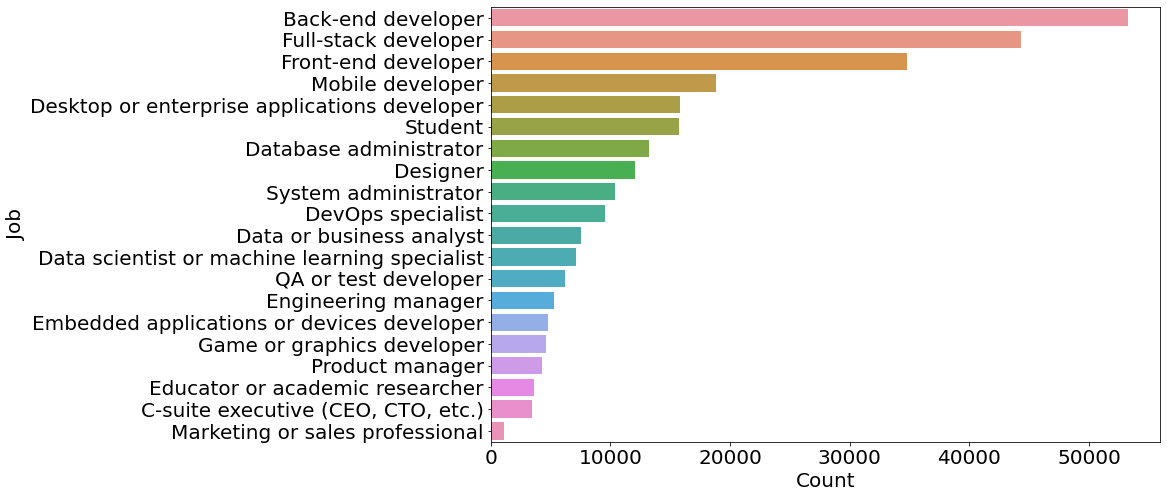

In [25]:
fig = plt.figure(figsize=(12,8))
sns.barplot(y = job_data['Job'], x = job_data['Count'])
plt.show()



### Hobby

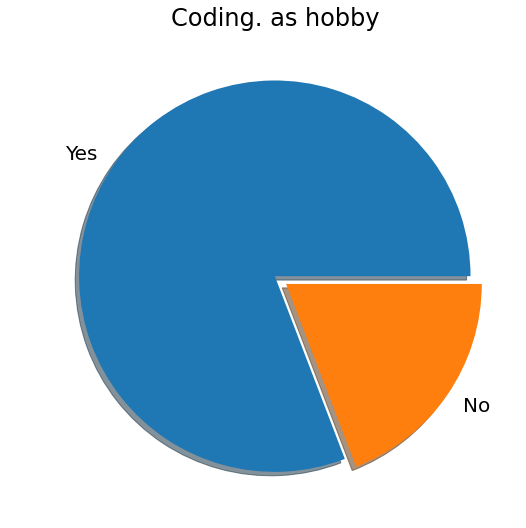

In [49]:
fig,ax = plt.subplots(1, 1, figsize= (9,9))
ax = public['Hobby'].value_counts().plot.pie( shadow = True, 
                                            explode = [0, 0.07])
ax.set_ylabel(' ')
plt.title("Coding. as hobby")
plt.show()

### Language

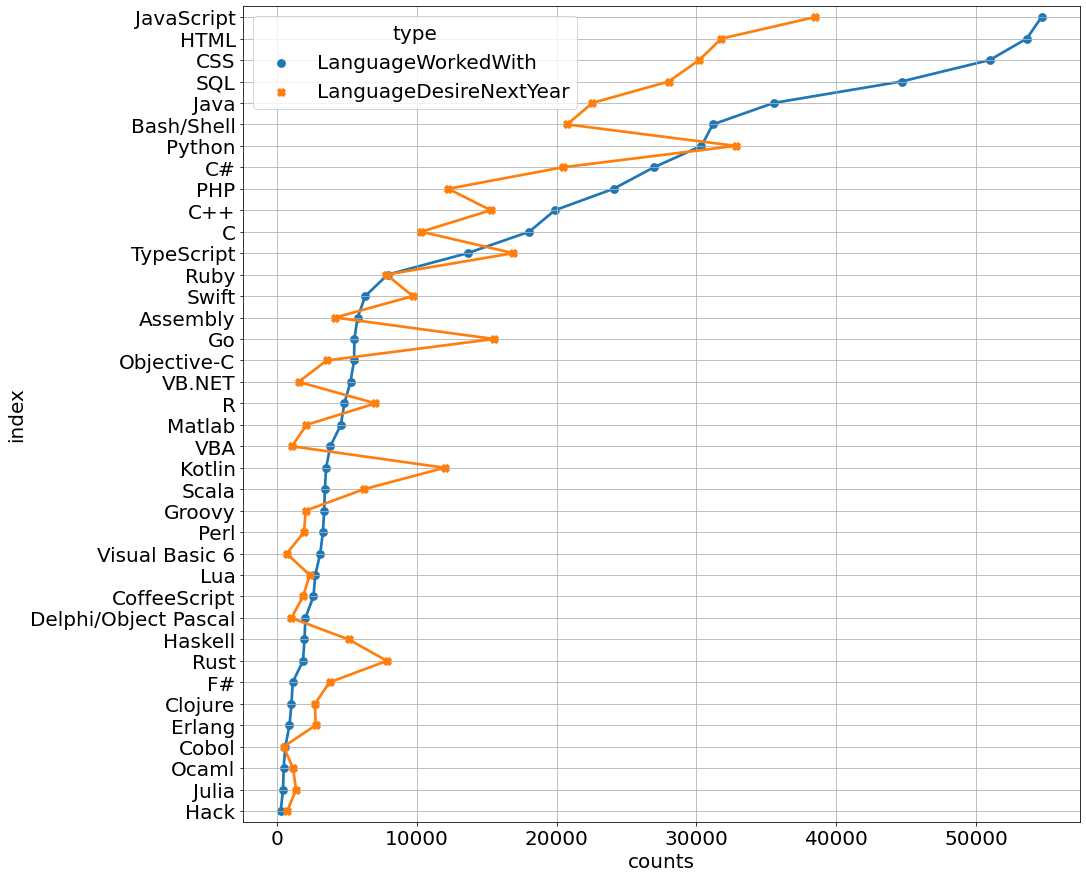

In [27]:
data1 = public['LanguageWorkedWith'].str.split(';',expand = True).stack().reset_index()[0].value_counts().reset_index()
data1['type'] = 'LanguageWorkedWith'
data2 = public['LanguageDesireNextYear'].str.split(';', expand = True).stack().reset_index()[0].value_counts().reset_index()
data2['type'] = 'LanguageDesireNextYear'

data = pd.concat([data1, data2], axis = 0)
data.rename(columns = {0:'counts'}, inplace = True)

sns.pointplot(x = "counts", y  = "index", data = data, hue = 'type', join  = True, markers = ["o", "X"])
plt.grid(True, alpha =1)
g = plt.gcf()
g.set_size_inches(15, 15)

### Education

In [38]:

education=[]
dev_edu=public['FormalEducation'].dropna()
for i in dev_edu.index:
    education.extend([x for x in dev_edu[i].split('\n')])

In [39]:
education

['Bachelor’s degree (BA, BS, B.Eng., etc.)',
 'Bachelor’s degree (BA, BS, B.Eng., etc.)',
 'Associate degree',
 'Bachelor’s degree (BA, BS, B.Eng., etc.)',
 'Some college/university study without earning a degree',
 'Bachelor’s degree (BA, BS, B.Eng., etc.)',
 'Some college/university study without earning a degree',
 'Bachelor’s degree (BA, BS, B.Eng., etc.)',
 'Some college/university study without earning a degree',
 'Bachelor’s degree (BA, BS, B.Eng., etc.)',
 'Master’s degree (MA, MS, M.Eng., MBA, etc.)',
 'Bachelor’s degree (BA, BS, B.Eng., etc.)',
 'Some college/university study without earning a degree',
 'Bachelor’s degree (BA, BS, B.Eng., etc.)',
 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
 'Master’s degree (MA, MS, M.Eng., MBA, etc.)',
 'Bachelor’s degree (BA, BS, B.Eng., etc.)',
 'Master’s degree (MA, MS, M.Eng., MBA, etc.)',
 'Bachelor’s degree (BA, BS, B.Eng., etc.)',
 'Bachelor’s degree (BA, BS, B.Eng., etc.)',
 'Bachelor’s degr

In [40]:
unique_edu=dict(Counter(education))

In [41]:
unique_edu

{'Bachelor’s degree (BA, BS, B.Eng., etc.)': 43659,
 'Associate degree': 2970,
 'Some college/university study without earning a degree': 11710,
 'Master’s degree (MA, MS, M.Eng., MBA, etc.)': 21396,
 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 8951,
 'Primary/elementary school': 1656,
 'Professional degree (JD, MD, etc.)': 1447,
 'I never completed any formal education': 700,
 'Other doctoral degree (Ph.D, Ed.D., etc.)': 2214}

In [45]:
education_data=pd.DataFrame(list(unique_edu.items()),columns=['FormalEducation','Count'])
education_data.sort_values(by=['Count'],ascending=False,inplace=True)

In [46]:
education_data.head()

FormalEducation  \
0                                            Bachelor’s degree (BA, BS, B.Eng., etc.)   
3                                         Master’s degree (MA, MS, M.Eng., MBA, etc.)   
2                              Some college/university study without earning a degree   
4  Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)   
1                                                                    Associate degree   

   Count  
0  43659  
3  21396  
2  11710  
4   8951  
1   2970

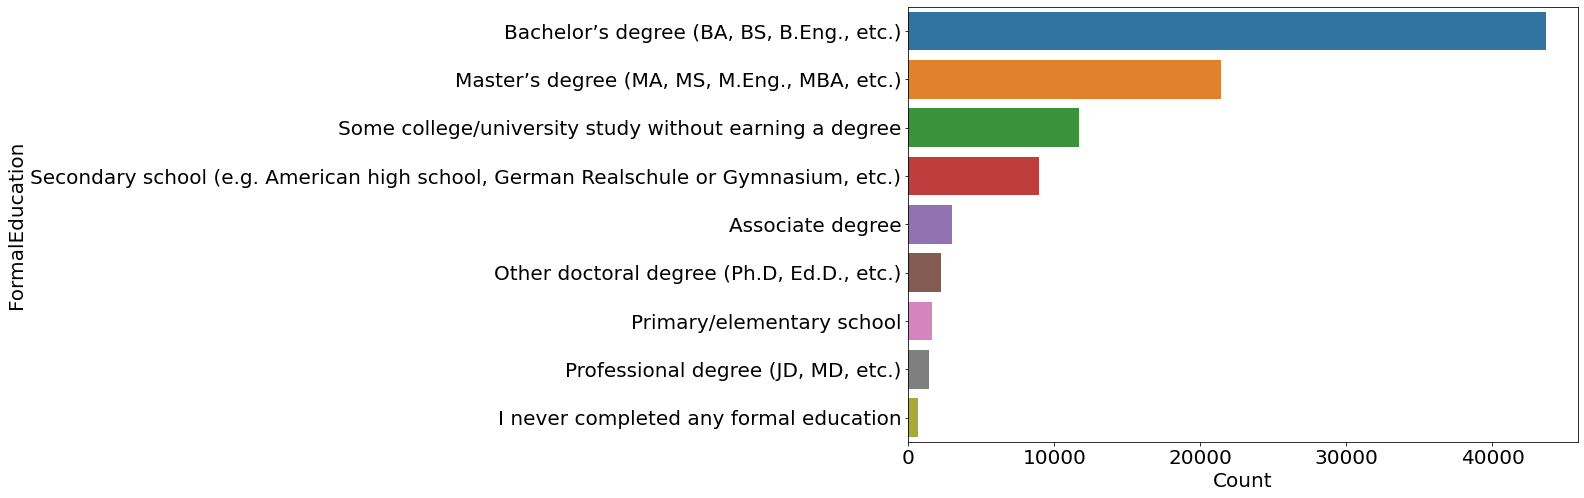

In [47]:
fig = plt.figure(figsize=(12,8))
sns.barplot(y = education_data['FormalEducation'], x = education_data['Count'])
plt.show()


### Age

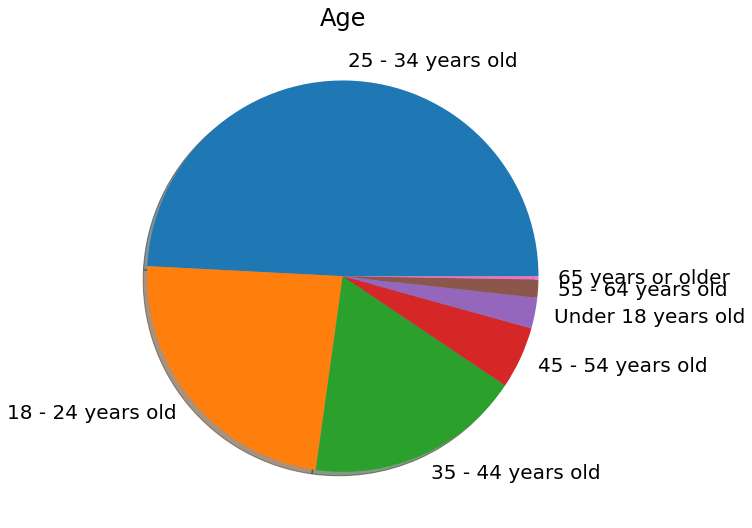

In [48]:
fig,ax = plt.subplots(1, 1, figsize= (9,9))
ax = public['Age'].value_counts().plot.pie( shadow = True
                                            )
ax.set_ylabel(' ')
plt.title("Age")
plt.xticks(rotation = 20, fontsize = 40)
plt.show()